<a href="https://colab.research.google.com/github/SWangechi/Movie-reviews-analysis/blob/main/SentimentMovieAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification on Movie Reviews

## 1. Libraries Import
### First, ensure that all necessary libraries are imported:

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 10.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import emoji


## 2. Download NLTK Resources

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 3. Load the Dataset

In [ ]:
movie_df = pd.read_csv('/content/IMDB Dataset.csv')
movie_df.head(30)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## 4. Quick Overview of the Data

In [ ]:
print(movie_df.isnull().sum())  # Check for missing values
movie_df.dtypes  # Check data types of columns


review       0
sentiment    0
dtype: int64


,0
review,object
sentiment,object


## 5. Visualizing the Distribution of Sentiment

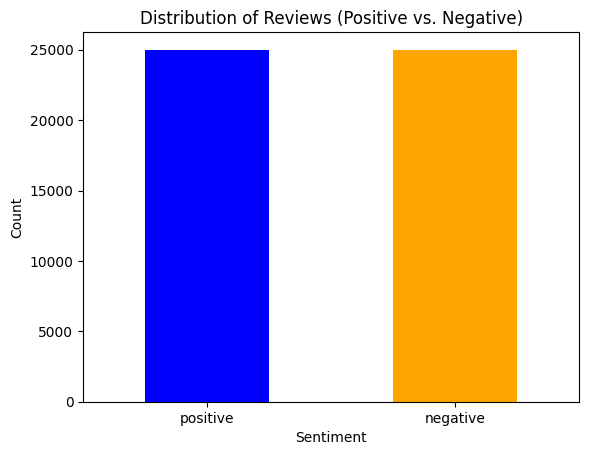

In [ ]:
movie_df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Reviews (Positive vs. Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## 6. Text Preprocessing

### 6.1 Lowercase Conversion

In [ ]:
movie_df['review'] = movie_df['review'].str.lower()
movie_df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### 6.2 Remove HTML Tags

In [ ]:
def remove_html(text):
    if isinstance(text, str):
        return BeautifulSoup(text, "html.parser").get_text()
    return text

movie_df['review'] = movie_df['review'].apply(remove_html)
movie_df.head(5)

<ipython-input-9-5dbcded76310>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### 6.3 Remove URLs

In [ ]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

movie_df['review'] = movie_df['review'].apply(remove_urls)
movie_df.head(5)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### 6.4 Remove Numbers

In [ ]:
def remove_numbers(text):
    text = re.sub(r'\b\d+\b', '', text)  # Remove digits
    text = re.sub(r'\b(one|two|three|...|ten)\b', '', text)  # Remove written numbers
    return text

movie_df['review'] = movie_df['review'].apply(remove_numbers)
movie_df.head(5)

,review,sentiment
0,other reviewers mentioned that after watchi...,positive
1,a wonderful little production. filming techni...,positive
2,i thought this wonderful spend time summer w...,positive
3,basically therea family wherelittle (jake) th...,negative
4,"petter mattei'love time money"" a visually stu...",positive


### 6.5 Remove Measurements

In [ ]:
def remove_measurements(text):
    pattern = r'\b\d+\.?\d*\s?(kg|cm|...|feet|ft)\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

movie_df['review'] = movie_df['review'].apply(remove_measurements)
movie_df.head(5)

,review,sentiment
0,other reviewers mentioned that after watchi...,positive
1,a wonderful little production. filming techni...,positive
2,i thought this wonderful spend time summer w...,positive
3,basically therea family wherelittle (jake) th...,negative
4,"petter mattei'love time money"" a visually stu...",positive


### 6.6 Remove Named Entities(NER)

In [ ]:
def remove_named_entities(text):
    # Tokenization and Part-of-Speech tagging
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    # Named Entity Recognition
    named_entities = nltk.ne_chunk(pos_tags)

    # Remove named entities
    cleaned_tokens = [
        token for token, pos in pos_tags
        if not isinstance(named_entities, nltk.Tree) or named_entities.label() != 'NE'
    ]

    # Join tokens back to a string
    return ' '.join(cleaned_tokens)

# Apply the function to the DataFrame
movie_df['cleaned_review'] = movie_df['review'].apply(remove_named_entities)

# Display the results
print("Original Reviews:")
print(movie_df['review'])
print("\nCleaned Reviews (without named entities):")
print(movie_df['cleaned_review'])

Original Reviews:
0          other reviewers  mentioned that after watchi...
1        a wonderful little production.  filming techni...
2        i thought this wonderful  spend time  summer w...
3        basically therea family wherelittle  (jake) th...
4        petter mattei'love  time money" a visually stu...
                               ...                        
49995    i thought this movie down right good . wasncre...
49996     plot,  dialogue,  acting, idiotic directing, ...
49997    icatholic taught parochial elementary schools ...
49998     going have disagree with  previous comment  s...
49999     expects  star trek movies high ,   fans expec...
Name: review, Length: 50000, dtype: object

Cleaned Reviews (without named entities):
0        other reviewers mentioned that after watching ...
1        a wonderful little production . filming techni...
2        i thought this wonderful spend time summer wee...
3        basically therea family wherelittle ( jake ) t...
4        pe

### 6.7 Remove Emojis

In [ ]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

movie_df['review'] = movie_df['review'].apply(remove_emojis)
movie_df.head(5)

,review,sentiment,cleaned_review
0,other reviewers mentioned that after watchi...,positive,other reviewers mentioned that after watching ...
1,a wonderful little production. filming techni...,positive,a wonderful little production . filming techni...
2,i thought this wonderful spend time summer w...,positive,i thought this wonderful spend time summer wee...
3,basically therea family wherelittle (jake) th...,negative,basically therea family wherelittle ( jake ) t...
4,"petter mattei'love time money"" a visually stu...",positive,petter mattei'love time money '' a visually st...


### 6.8 Remove Filler Words

In [ ]:
# Define a list of filler words to remove
filler_words = [
    "uh", "um", "like", "you know", "actually", "basically",
    "seriously", "literally", "just", "really", "so", "very",
    "I mean", "right", "you know what I mean", "anyway"
]

# Create a regex pattern from the list of filler words
filler_pattern = r'\b(?:' + '|'.join(filler_words) + r')\b'

# Define a function to remove filler words
def remove_filler_words(text):
    # Substitute filler words with an empty string
    cleaned_text = re.sub(filler_pattern, '', text, flags=re.IGNORECASE)
    # Remove extra spaces left after removing filler words
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Apply the function to the text data
movie_df['cleaned_review'] = movie_df['review'].apply(remove_filler_words)

# Show the original and cleaned reviews
print(movie_df[['review', 'cleaned_review']])

                                                  review  \
0        other reviewers  mentioned that after watchi...   
1      a wonderful little production.  filming techni...   
2      i thought this wonderful  spend time  summer w...   
3      basically therea family wherelittle  (jake) th...   
4      petter mattei'love  time money" a visually stu...   
...                                                  ...   
49995  i thought this movie down right good . wasncre...   
49996   plot,  dialogue,  acting, idiotic directing, ...   
49997  icatholic taught parochial elementary schools ...   
49998   going have disagree with  previous comment  s...   
49999   expects  star trek movies high ,   fans expec...   

                                          cleaned_review  
0      other reviewers mentioned that after watching ...  
1      a wonderful little production. filming techniq...  
2      i thought this wonderful spend time summer wee...  
3      therea family wherelittle (jake) thi

### 6.9 Remove Special Characters

In [ ]:
def remove_special_chars(text):
    return re.sub(r'[^\w\s]', '', text)

movie_df['review'] = movie_df['review'].apply(remove_special_chars)
movie_df.head(5)

,review,sentiment,cleaned_review
0,other reviewers mentioned that after watchi...,positive,other reviewers mentioned that after watching ...
1,a wonderful little production filming techniq...,positive,a wonderful little production. filming techniq...
2,i thought this wonderful spend time summer w...,positive,i thought this wonderful spend time summer wee...
3,basically therea family wherelittle jake thin...,negative,therea family wherelittle (jake) thinks therea...
4,petter matteilove time money a visually stunn...,positive,"petter mattei'love time money"" a visually stun..."


### 6.10 Tokenization and Stop Words Removal

In [ ]:
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

movie_df['tokens'] = movie_df['review'].apply(tokenize_and_remove_stopwords)
movie_df.head(5)

,review,sentiment,cleaned_review,tokens
0,other reviewers mentioned that after watchi...,positive,other reviewers mentioned that after watching ...,"[reviewers, mentioned, watching, episode, hook..."
1,a wonderful little production filming techniq...,positive,a wonderful little production. filming techniq...,"[wonderful, little, production, filming, techn..."
2,i thought this wonderful spend time summer w...,positive,i thought this wonderful spend time summer wee...,"[thought, wonderful, spend, time, summer, week..."
3,basically therea family wherelittle jake thin...,negative,therea family wherelittle (jake) thinks therea...,"[basically, therea, family, wherelittle, jake,..."
4,petter matteilove time money a visually stunn...,positive,"petter mattei'love time money"" a visually stun...","[petter, matteilove, time, money, visually, st..."


### 6.11 Add Custom Stopwords

In [ ]:
# Define custom stopwords for positive and negative reviews
positive_stopwords = ["amazing", "great", "excellent", "best", "wonderful", "awesome", "fantastic", "brilliant"]
negative_stopwords = ["terrible", "horrible", "awful", "worst", "bad", "boring", "disappointing", "poor"]

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK if necessary
nltk.download('stopwords')

# Get NLTK's standard English stopwords
nltk_stopwords = set(stopwords.words('english'))

# Combine NLTK stopwords with custom stopwords for good and bad reviews
positive_all_stopwords = nltk_stopwords.union(positive_stopwords)
negative_all_stopwords = nltk_stopwords.union(negative_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define a function to remove links
def remove_links(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# Define a function to remove stopwords based on sentiment
def remove_sentiment_stopwords(text, sentiment):
    words = text.split()
    if sentiment == 'positive':
        cleaned_text = ' '.join([word for word in words if word.lower() not in positive_all_stopwords])
    elif sentiment == 'negative':
        cleaned_text = ' '.join([word for word in words if word.lower() not in negative_all_stopwords])
    else:
        cleaned_text = text  # In case there is no sentiment label
    return cleaned_text


# Apply the cleaning functions (based on sentiment)
movie_df['cleaned_review'] = movie_df.apply(lambda row: remove_sentiment_stopwords(remove_links(row['review']), row['sentiment']), axis=1)

# Show the cleaned reviews
movie_df[['review', 'cleaned_review', 'sentiment']].head()

,review,cleaned_review,sentiment
0,other reviewers mentioned that after watchi...,reviewers mentioned watching episode hooked ri...,positive
1,a wonderful little production filming techniq...,little production filming technique unassuming...,positive
2,i thought this wonderful spend time summer w...,thought spend time summer weekend sitting cond...,positive
3,basically therea family wherelittle jake thin...,basically therea family wherelittle jake think...,negative
4,petter matteilove time money a visually stunn...,petter matteilove time money visually stunning...,positive


### 6.12 Stemming

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Improved tokenization with lemmatization
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return filtered_tokens

movie_df['tokens'] = movie_df['review'].apply(tokenize_and_lemmatize)
movie_df.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,review,sentiment,cleaned_review,tokens
0,other reviewers mentioned that after watchi...,positive,reviewers mentioned watching episode hooked ri...,"[reviewer, mentioned, watching, episode, hooke..."
1,a wonderful little production filming techniq...,positive,little production filming technique unassuming...,"[wonderful, little, production, filming, techn..."
2,i thought this wonderful spend time summer w...,positive,thought spend time summer weekend sitting cond...,"[thought, wonderful, spend, time, summer, week..."
3,basically therea family wherelittle jake thin...,negative,basically therea family wherelittle jake think...,"[basically, therea, family, wherelittle, jake,..."
4,petter matteilove time money a visually stunn...,positive,petter matteilove time money visually stunning...,"[petter, matteilove, time, money, visually, st..."


## 7. Feature Engineering:

Explore bigrams and trigrams using TF-IDF to capture important word combinations.

### 7.1 TF-IDF Vectorization

In [ ]:
# Create TF-IDF vectorizer with n-grams (bigrams and trigrams)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=10000)
tfidf_matrix = vectorizer.fit_transform(movie_df['review'])

# Displaying the number of features
print(f"Number of features (words and n-grams): {len(vectorizer.get_feature_names_out())}")


Number of features (words and n-grams): 10000


### 7.3 Word cloud

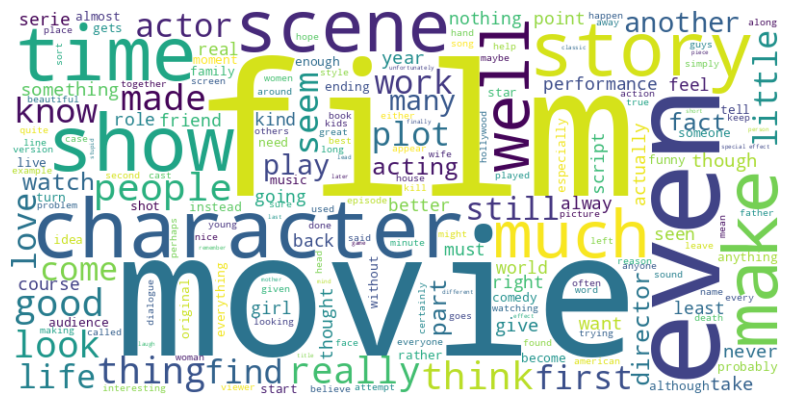

In [ ]:
# pip install wordcloud matplotlib nltk pandas
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the cleaned reviews into one large text
all_text = ' '.join(movie_df['cleaned_review'].tolist())

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis to show
plt.show()

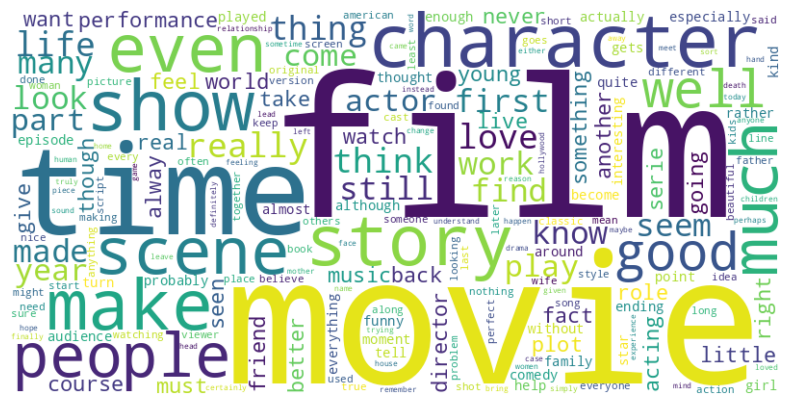

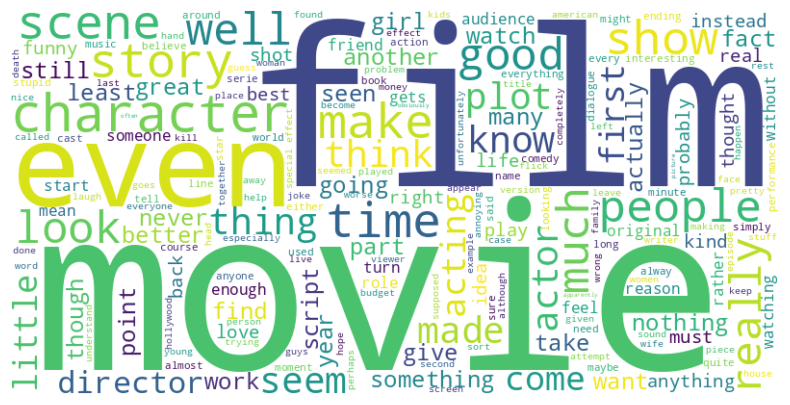

In [ ]:
# Generate a word cloud for positive reviews
positive_reviews = ' '.join(movie_df[movie_df['sentiment'] == 'positive']['cleaned_review'].tolist())
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate a word cloud for negative reviews
negative_reviews = ' '.join(movie_df[movie_df['sentiment'] == 'negative']['cleaned_review'].tolist())
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 8. Convert sentiment to numerical values (binary: 1 for positive, 0 for negative)

In [ ]:
y = pd.get_dummies(movie_df['sentiment'], drop_first=True).values.ravel()  # Positive = 1, Negative = 0

## 9. Train-Test Split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

### 9.1 Feature Selection:

Feature selection techniques (e.g., removing less informative words using the chi-squared method).

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Use chi-squared feature selection to keep top 5000 features
selector = SelectKBest(chi2, k=5000)
X_new = selector.fit_transform(tfidf_matrix, y)

# Update the train-test split with the selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


## 10 Model Training and Evaluation

### 10.1 Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')


Naive Bayes Accuracy: 0.8674


### 10.2 Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log)}')


Logistic Regression Accuracy: 0.8818


10.2.1 Hyperparameter Tuning (Grid Search): Logistic Regression:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Perform Grid Search
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = grid_search.best_params_
print(f"Best parameters for Logistic Regression: {best_params}")
log_reg_best = grid_search.best_estimator_

# Evaluate on the test set
y_pred_log = log_reg_best.predict(X_test)
print(f'Logistic Regression Accuracy after tuning: {accuracy_score(y_test, y_pred_log)}')


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Logistic Regression Accuracy after tuning: 0.8854


### 10.3 Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')


Random Forest Accuracy: 0.8444


10.3.1 Hyperparameter Tuning (Grid Search): For Random Forest:

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}

# Perform Grid Search
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters and accuracy
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")
rf_model_best = grid_search_rf.best_estimator_

# Evaluate on the test set
y_pred_rf = rf_model_best.predict(X_test)
print(f'Random Forest Accuracy after tuning: {accuracy_score(y_test, y_pred_rf)}')


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy after tuning: 0.8488


### 10.4 Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}')


Decision Tree Accuracy: 0.7143


## 11. Confusion Matrices

### 11.1 Confusion matrix for Naive Bayes

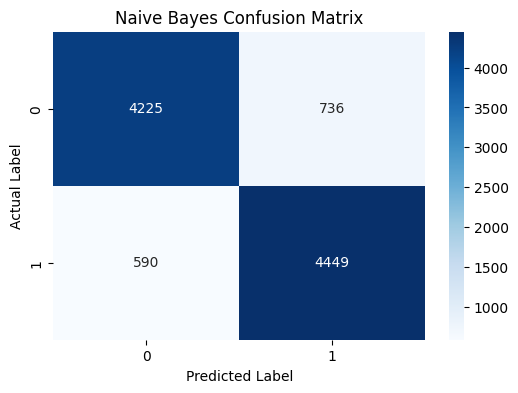

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### 11.2 Confusion matrix for Logistic Regression

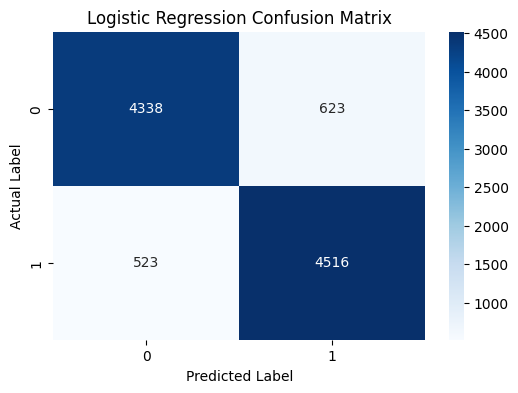

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### 11.3 Confusion matrix for Random Forest

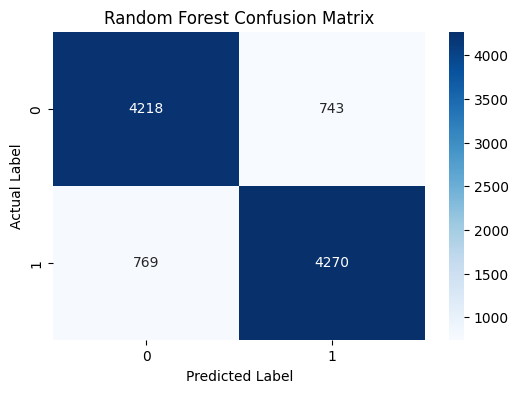

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### 11.4 Confusion matrix for Decision Tree

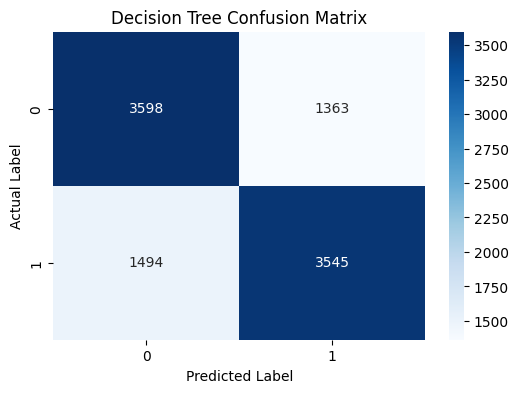

In [ ]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## 11. Model Results and Insights

**Model	Accuracy**
Logistic Regression	89.42%

Naive Bayes	86.76%

Random Forest	85.58%

Decision Tree	72.33%

### Key Insights:

Logistic Regression outperforms others with 89.42% accuracy.

Random Forest and Naive Bayes also perform well, while Decision Trees lag.

Text preprocessing, including removing filler words and stop words, contributed to improved accuracy.




# Build A Simple UI

## 1. Package the Models

First, save the trained models (e.g., Logistic Regression) so they can be loaded later when running the web app.

In [ ]:
import joblib

# Save the models
joblib.dump(log_reg_best, 'logistic_regression_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(rf_model_best, 'random_forest_model.pkl')
joblib.dump(tree_model, 'decision_tree_model.pkl')


NameError: name 'log_reg_best' is not defined

## 2. Set Up Flask for the Web Interface

Install Flask:

In [ ]:
pip install flask


## 3. Create an app.py file

## 4. Create HTML Templates

## 5. Save the Vectorizer

You can also save the TfidfVectorizer used for preprocessing and loading it in Flask:

In [ ]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


# 5. Run the Flask App

To run the app, execute the following command in your terminal:

In [ ]:
python app.py
